<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Introduction  

### Predictive Machine Learning Modeling in Python with scikit-learn 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Machine Learning-based Prediction

Here's a simple workflow, demonstration of training and tuning a machine learning model with a simple dataset.  

* I provide this as the most basic, minimum Python workflow to assist those learning predictive machine learning

* I demonstration model training and tuning (by-hand and automatically), including the pipeline approach

* Given the 1 predictor feature and 1 response for ease of data and model visualization

This provides an opportunity to run and visualize a variety of machine learning models for experiential learning.

#### Machine Learning-based Prediction

We build predictive machine learning models with supervised learning: 

**Prediction**

* non-parametric method for regression (continuous response) and classification (categorical response)

* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form: 

\begin{equation}
\hat{Y} = \hat{f}(X_1,\ldots,X_m) + \epsilon
\end{equation}

where $\epsilon$ is an error term.

**Suppervised Learning**

* the response feature, $Y$, is available over the training and testing data

#### The Machine Learning Models

This workflow includes the following model:

* decision tree regression

For more information about decision trees check out this [decision tree lecture](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_DecisionTree.ipynb) and the associated demonstration workflows

#### Getting Started

Here's the steps to get setup in Python:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

If you want to work locally you will need to first copy the data file to your working directory. It is available here:

* Tabular data - unconv_MV.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv).

You don't have to download the data if you want to load directly from my github account with the code below.

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn.neighbors import KNeighborsRegressor           # for nearest k neighbours
from sklearn import tree                                    # decision trees
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import cross_val_score         # cross validation methods
import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
import matplotlib.ticker as ticker                          # modify the plot axis labels
from matplotlib import gridspec
from subprocess import check_call
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.preprocessing import StandardScaler            # data transformation
from sklearn.pipeline import Pipeline                       # machine learning modeling pipeline
from sklearn.pipeline import make_pipeline                  # machine learning modeling pipeline
from sklearn.model_selection import GridSearchCV            # model hyperparameter grid search
from sklearn.model_selection import KFold                   # k-fold cross validation
# from IPython.core.interactiveshell import InteractiveShell  # show all outputs
# InteractiveShell.ast_node_interactivity = "all"

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the Random Number Seed

These workflows and models may use random processes, e.g.:

* random train and test split with cross validation and k-fold cross validation
* random selection of a subset of features to consider for the next split

In [2]:
seed = 73073                                                # random number seed
np.random.seed(seed)                                        # scikit-learn uses the NumPy seed

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [3]:
os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

We use a data "unconv_MV.csv" comma delimited file from my GitHub [respository](https://github.com/GeostatsGuy/GeoDataSets).  

* this code loads the data directly from my GitHub repository.
* if you have the data file available locally (i.e. you are not connected to the internet) set the working directory to the location with the data file and use the second line below

In [4]:
my_data = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv") # load the comma delimited data file
#my_data = pd.read_csv("1D_Porosity.csv")                   # load the comma delimited data file locally
X = pd.DataFrame(data = my_data.loc[:,'Depth'])             # ensure X and y features are DataFrames
y = pd.DataFrame(data = my_data.loc[:,'Nporosity'])
X.head(n=2); y.head(n=2)                                    # preview the predictor feature
print('Loaded ' + str(len(my_data)) + ' samples.')

Loaded 40 samples.


#### Plot the Available Data

Let's do a simple scatter plot to check the data.

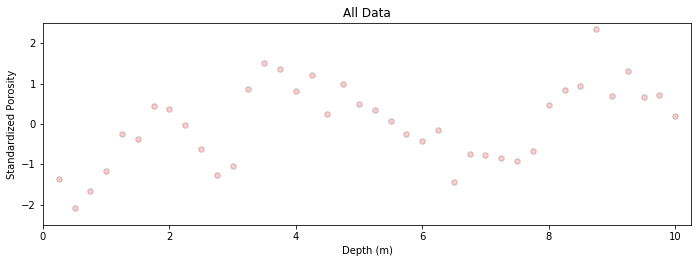

In [5]:
plt.scatter(X,y,color='red',s=30,edgecolor='black',alpha=0.2); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('All Data'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Fast Forward Through Data Analytics

This workflow is focussed on building predictive machine learning models

* for brevity we skip data checking, data analytics, statistical analysis, feature transformations 

* we skip directly to model building

This is the most simple workflow possible!

#### Let's Build a Predictive Machine Learning Model

We use the following steps to build our model

1. **instantiate** the machine learning model with hyperparameters
2. **fit**, train the machine learing model to the training data
3. **predict**. check the trained machine learning models to predict at withheld testing data

We will use the train - test approach, an alternative is the train, validate and test approach. 

* we will cover k-fold cross validation and robust hyperparameter tuning later

#### Optional: Add Random Error to the Response Feature, $y$

This dataset is quite well-behaved and error free.

* to observe issues of overfit in model training let's add some error

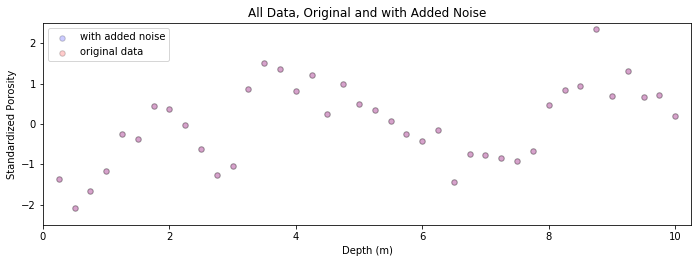

In [6]:
standardized_error_standard_deviation = 0.0                 # standard deviation of random error to add
y_orig = y.copy(deep = True)                                # make a deep copy of original dataset
y['Nporosity'] = y['Nporosity'] + np.random.normal(loc = 0, scale = standardized_error_standard_deviation, size = y.shape[0])
plt.scatter(X,y,color='blue',s=30,edgecolor='black',alpha=0.2,label='with added noise'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('All Data, Original and with Added Noise'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])
plt.scatter(X,y_orig,color='red',s=30,edgecolor='black',alpha=0.2,label='original data'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.legend(loc='upper left')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Split Train and Test

We will demonstrate the following hyperparameter tuning methods:

* cross validation - split 25% of data as withheld testing data,scatter plot estimated vs. actual production
* k-fold cross validation - calculate average error over k folds, plot error vs. model complexity

Let's start with cross validation.

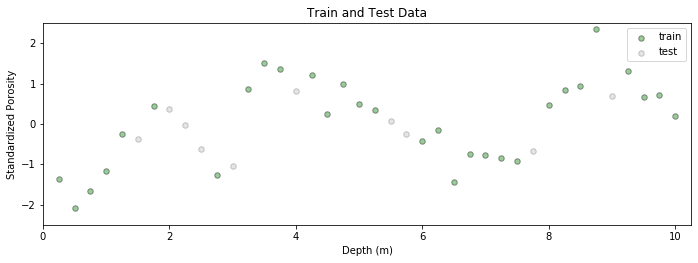

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=seed) # train and test split
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); 
plt.scatter(X_test,y_test,color='gray',s=30,edgecolor='black',alpha=0.2,label='test'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Build a Decision Tree Model

Let's instantiate and fit a decision tree regression model to our data. 

In [8]:
from sklearn import tree                                    # tree program from scikit learn (package for machine learning)
max_leaf_nodes = 6                                          # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes) # instantiate the model
our_tree = our_tree.fit(X_train, y_train)                   # fit the model to the trainin data

#### Predict With a Decision Tree Model

Let's now make a prediction with our decision tree model

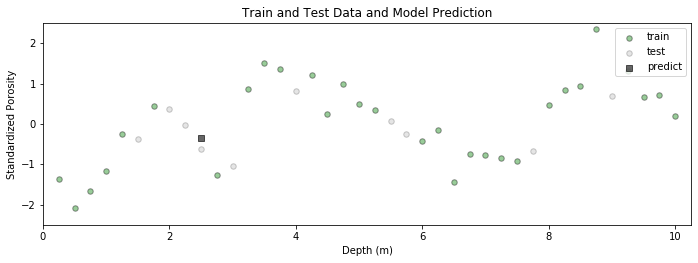

In [12]:
depth = 2.5                                               # set the predictor value for our prediction
spor = our_tree.predict([[depth]])                        # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data and Model Prediction'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]) 
plt.scatter(X_test,y_test,color='gray',s=30,edgecolor='black',alpha=0.2,label='test'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.scatter(depth,spor,color='black',s=30,marker='s',edgecolor='black',alpha=0.6,label='predict'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Predict Over a Range of Predictor Feature Values with a Decision Tree Model

Now, let's make predictions over a range of predictor feature values so we can visualize the model.

* this is easy to do since we have just 1 predictor feature

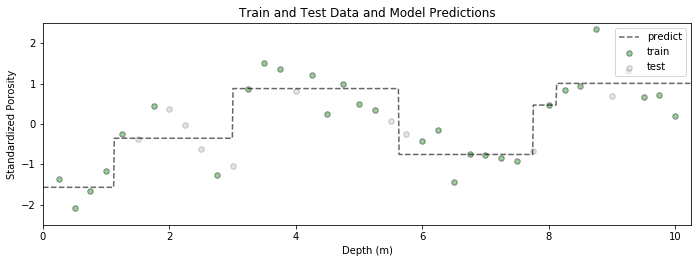

In [13]:
depths = np.linspace(0,10.25,1000)                          # set the predictor values for our prediction
spors = our_tree.predict(depths.reshape(-1, 1))             # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data and Model Predictions'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); plt.scatter(X_test,y_test,color='gray',s=30,edgecolor='black',alpha=0.2,label='test'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.plot(depths,spors,color='black',alpha=0.6,label='predict',linestyle='--'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Changing the Model Hyperparater(s)

Let's try changing the model complexity and retraining the model

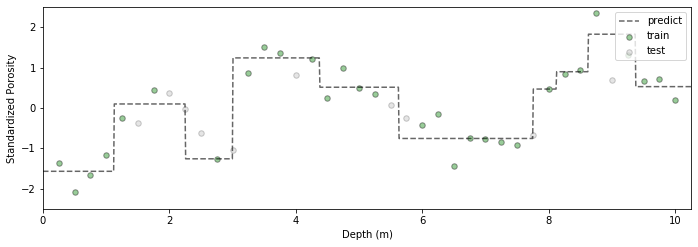

In [14]:
max_leaf_nodes = 10                                          # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes) # instantiate the model
our_tree = our_tree.fit(X_train, y_train)                   # fit the model to the trainin data
spors = our_tree.predict(depths.reshape(-1, 1))             # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); plt.scatter(X_test,y_test,color='gray',s=30,edgecolor='black',alpha=0.2,label='test'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.plot(depths,spors,color='black',alpha=0.6,label='predict',linestyle='--'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Tuning the Model Hyperparater(s)

To tune the model hyperparameters we need a metric to summarize model error over the withheld testing data

* let's predict at the testing data and calculate our metric, testing mean square error. 

In [15]:
from sklearn import metrics                                 # measures to check our models
leaf_nodes = 10                                         # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes) # instantiate the model
our_tree = our_tree.fit(X_train, y_train)                   # fit the model to the trainin data
y_predict = our_tree.predict(X_test)                        # predict at the testing data locations
mse = metrics.mean_squared_error(y_test,y_predict)
print('Testing MSE is ' + str(round(mse,2)) + '.')

Testing MSE is 0.27.


#### Tuning the Model Hyperparater(s)

To tune the model hyperparameters we need to rebuild the model with variable level of complexity

* let's loop over the number of leaf nodes and access the performance over the withheld testing data

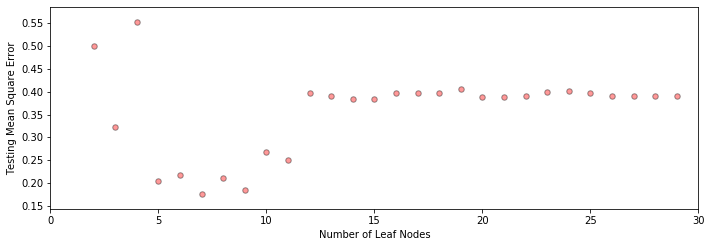

In [16]:
nodes = []; scores = []; max_leaf_nodes = 30
for i, nnode in enumerate(np.arange(2,max_leaf_nodes,1)):
    our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = nnode).fit(X_train, y_train) # instantiate / fit
    y_predict = our_tree.predict(X_test)                    # predict at the testing data locations
    nodes.append(nnode); scores.append(metrics.mean_squared_error(y_test,y_predict))
plt.scatter(nodes,scores,color='red',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.xlim([0,max_leaf_nodes]); plt.xlabel('Number of Leaf Nodes'); plt.ylabel('Testing Mean Square Error'); plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Tuning the Model Hyperparater(s)

To tune the model hyperparameters we need to rebuild the model with variable level of complexity

* for a more robust assessment of performance let's use scikit-learns k-fold cross validation

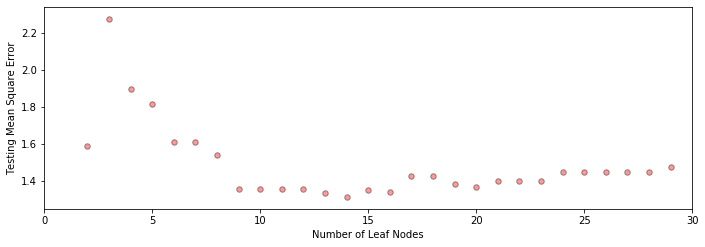

In [17]:
from sklearn.model_selection import cross_val_score as kfold       # cross validation methods
nodes = []; scores = []; max_leaf_nodes = 30
for i, nnode in enumerate(np.arange(2,max_leaf_nodes,1,dtype = int)):
    our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = nnode) # instantiate / fit
    nodes.append(nnode); 
    scores.append(abs(kfold(estimator=our_tree,X=X,y=y,cv=4,n_jobs=4,scoring = "neg_mean_squared_error").mean()))
plt.scatter(nodes,scores,color='red',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.xlim([0,max_leaf_nodes]); plt.xlabel('Number of Leaf Nodes'); plt.ylabel('Testing Mean Square Error'); plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Select the Best Hyperparameter(s) and Re-train on All Data 

The outcome from the previous work is the tuned hyperparameter, the optimum model complexity 

* now we retrain the tuned model on all the data and the model is ready for real-world use

* once again we are assuming a train and test workflow, not a train, validate and test workflow

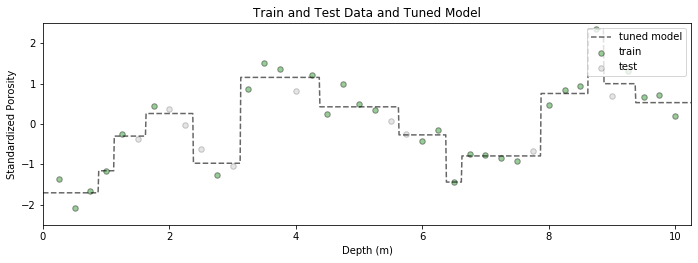

In [18]:
tuned_nodes = 14
our_tuned_tree = tree.DecisionTreeRegressor(max_leaf_nodes = tuned_nodes).fit(X, y) # instantiate / fit
tuned_spors = our_tuned_tree.predict(depths.reshape(-1, 1))             # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=0.4,label='train'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data and Tuned Model'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); plt.scatter(X_test,y_test,color='gray',s=30,edgecolor='black',alpha=0.2,label='test'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.plot(depths,tuned_spors,color='black',alpha=0.6,label='tuned model',linestyle='--'); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Same Complete Workflow with Pipelines

Let's repeat the above workflow with a pipline from scikit-learn. Here some general comments:

* **pipeline workflow steps** - list of steps, custom labels and the associated scikit-learn classes
* **choices and hyperparameters** - as a dictionary with combined step custom labels and hyperparameter names
* **workflow scenarios** - we can specify lists of choices and hyperparameters
* **consistent iteration** - the entire workflow is repeated for the full combinatorial
* **best model selected** - best combination of model hyperparameters and choices are refit with all data

In [26]:
pipe = Pipeline([                                           # the machine learning workflow as a pipeline object
    ('tree', tree.DecisionTreeRegressor())
])

params = {                                                  # the machine learning workflow method's parameters
    'tree__max_leaf_nodes': np.arange(2,max_leaf_nodes,1,dtype = int)
}

grid_cv_tuned = GridSearchCV(pipe, params, scoring = 'neg_mean_squared_error', # grid search cross validation 
                             cv=4,refit = True);

grid_cv_tuned.fit(X,y);                                      # fit model with tuned hyperparameters
print('Tuned maximum number of leaf nodes = ' + str(grid_cv_tuned.best_params_['tree__max_leaf_nodes']) + '.')
depth = 2.5
print('Prediction at depth = ' + str(depth) + ' m is ' + str(np.round(grid_cv_tuned.predict([[depth]]),2))) # predict with our trained model) + '.')

Tuned maximum number of leaf nodes = 14.
Prediction at depth = 2.5 m is [-0.97]


#### Comments

This was a very simple demonstration of predictive machine learning model building with Python's scikit-learn.

* this is a basic introduction, much more could be done

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
